# Загрузка датасета

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Распределение значений признаков Survived, Pclass, Age, Sex, Parch

In [3]:
import matplotlib.pyplot as plt

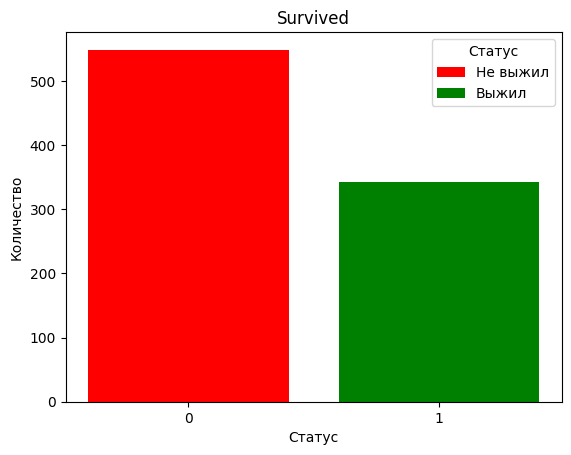

In [4]:
fig, ax = plt.subplots()
ax.bar(x=[str(elem) for elem in list(df['Survived'].unique())],
       height=df['Survived'].value_counts(),
       color=['red', 'green'],
       label=['Не выжил', 'Выжил'])
ax.set_title('Survived')
ax.set_xlabel('Статус')
ax.set_ylabel('Количество')
ax.legend(title='Статус')

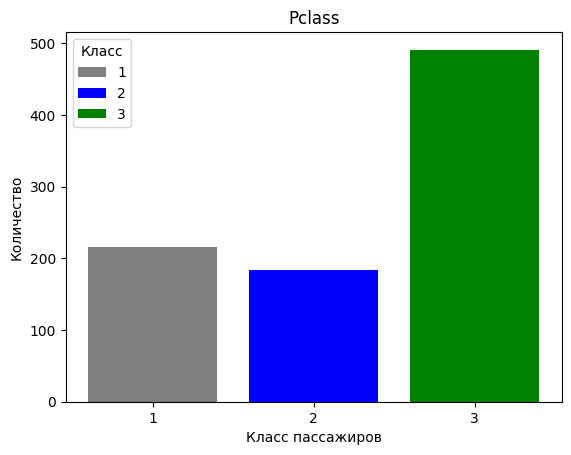

In [13]:
fig, ax = plt.subplots()
ax.bar(x=[str(elem) for elem in list(df['Pclass'].sort_values().unique())],
       height=df['Pclass'].value_counts().sort_index(),
       color=['grey', 'blue', 'green'],
       label=['1', '2', '3'])
ax.set_title('Pclass')
ax.set_xlabel('Класс пассажиров')
ax.set_ylabel('Количество')
ax.legend(title='Класс')

In [ ]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


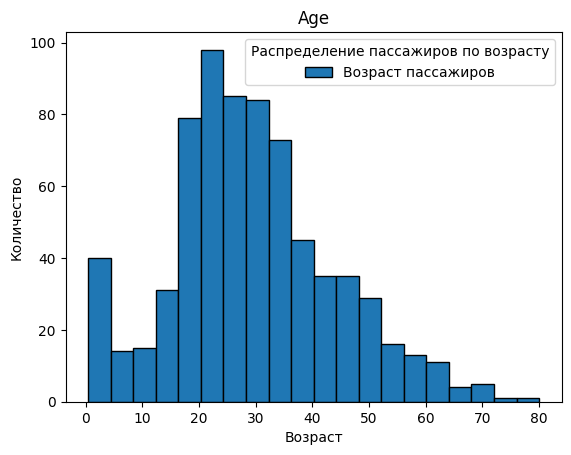

In [14]:
fig, ax = plt.subplots()
ax.hist(x=df['Age'].dropna(), bins=20, edgecolor='black',
        label=['Возраст пассажиров'])
ax.set_title('Age')
ax.set_ylabel('Количество')
ax.set_xlabel('Возраст')
ax.legend(title='Распределение пассажиров по возрасту')

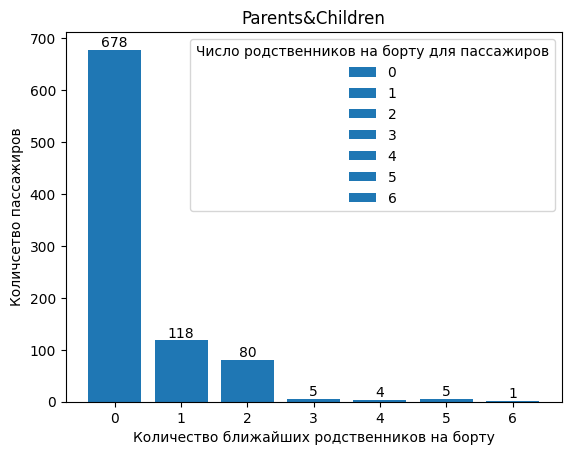

In [18]:
fig, ax = plt.subplots()
ax.bar_label(ax.bar(x=[str(elem) for elem in list(df['Parch'].sort_values().unique())],
                    height=df['Parch'].value_counts().sort_index(),
                    label=[str(elem) for elem in list(df['Parch'].sort_values().unique())]))

ax.set_title('Parents&Children')
ax.set_ylabel('Количсетво пассажиров')
ax.set_xlabel('Количество ближайших родственников на борту')
ax.legend(title='Число родственников на борту для пассажиров')

In [ ]:
df['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


# График типа boxplot для столбца Age

Text(0, 0.5, 'Возраст')

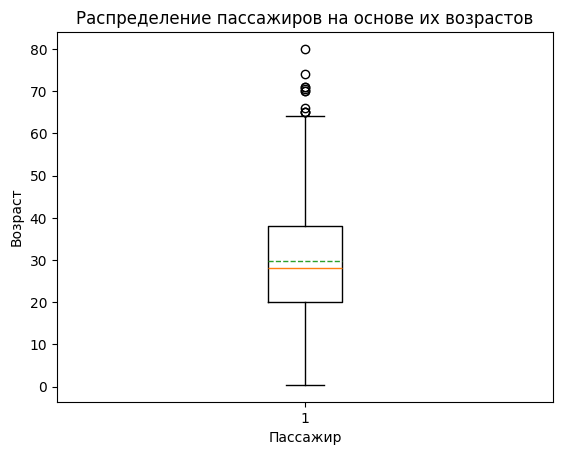

In [27]:
fig, ax = plt.subplots()
ax.boxplot(df['Age'].dropna(), showmeans=True, meanline=True);
ax.set_title('Распределение пассажиров на основе их возрастов')
ax.set_xlabel('Пассажир')
ax.set_ylabel('Возраст')

# Проинтепретируйте полученный график

Возраст пассажиров варьировался от 0 до 80 лет.

Больше всего пассажиров было в возрасте от 20 до 38 лет.

Средний возраст пассажиров составляется 30 лет, а медиана - 28.

# График типа pie chart для переменных Survived, Pclass, доли в процентах

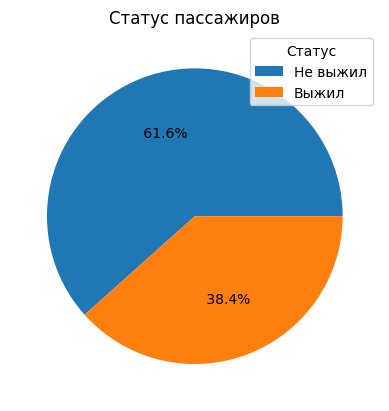

In [54]:
fig, ax = plt.subplots()
ax.pie(list(df['Survived'].value_counts()), autopct= ' %1.1f%%', )
ax.set_title('Статус пассажиров')
ax.legend(title='Статус', labels=['Не выжил', 'Выжил'])

In [43]:
list(df['Survived'].value_counts())

[549, 342]

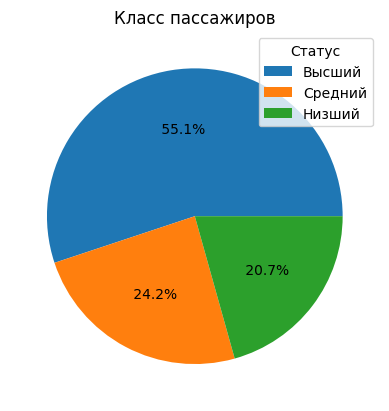

In [55]:
fig, ax = plt.subplots()
ax.pie(list(df['Pclass'].value_counts()), autopct= ' %1.1f%%', )
ax.set_title('Класс пассажиров')
ax.legend(title='Статус', labels=['Высший', 'Средний', 'Низший'])

In [56]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


# График типа pairplot для всех числовых переменных датасета

In [57]:
import seaborn as sns

In [63]:
df_nums = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
df_nums = df_nums.dropna()
df_nums

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


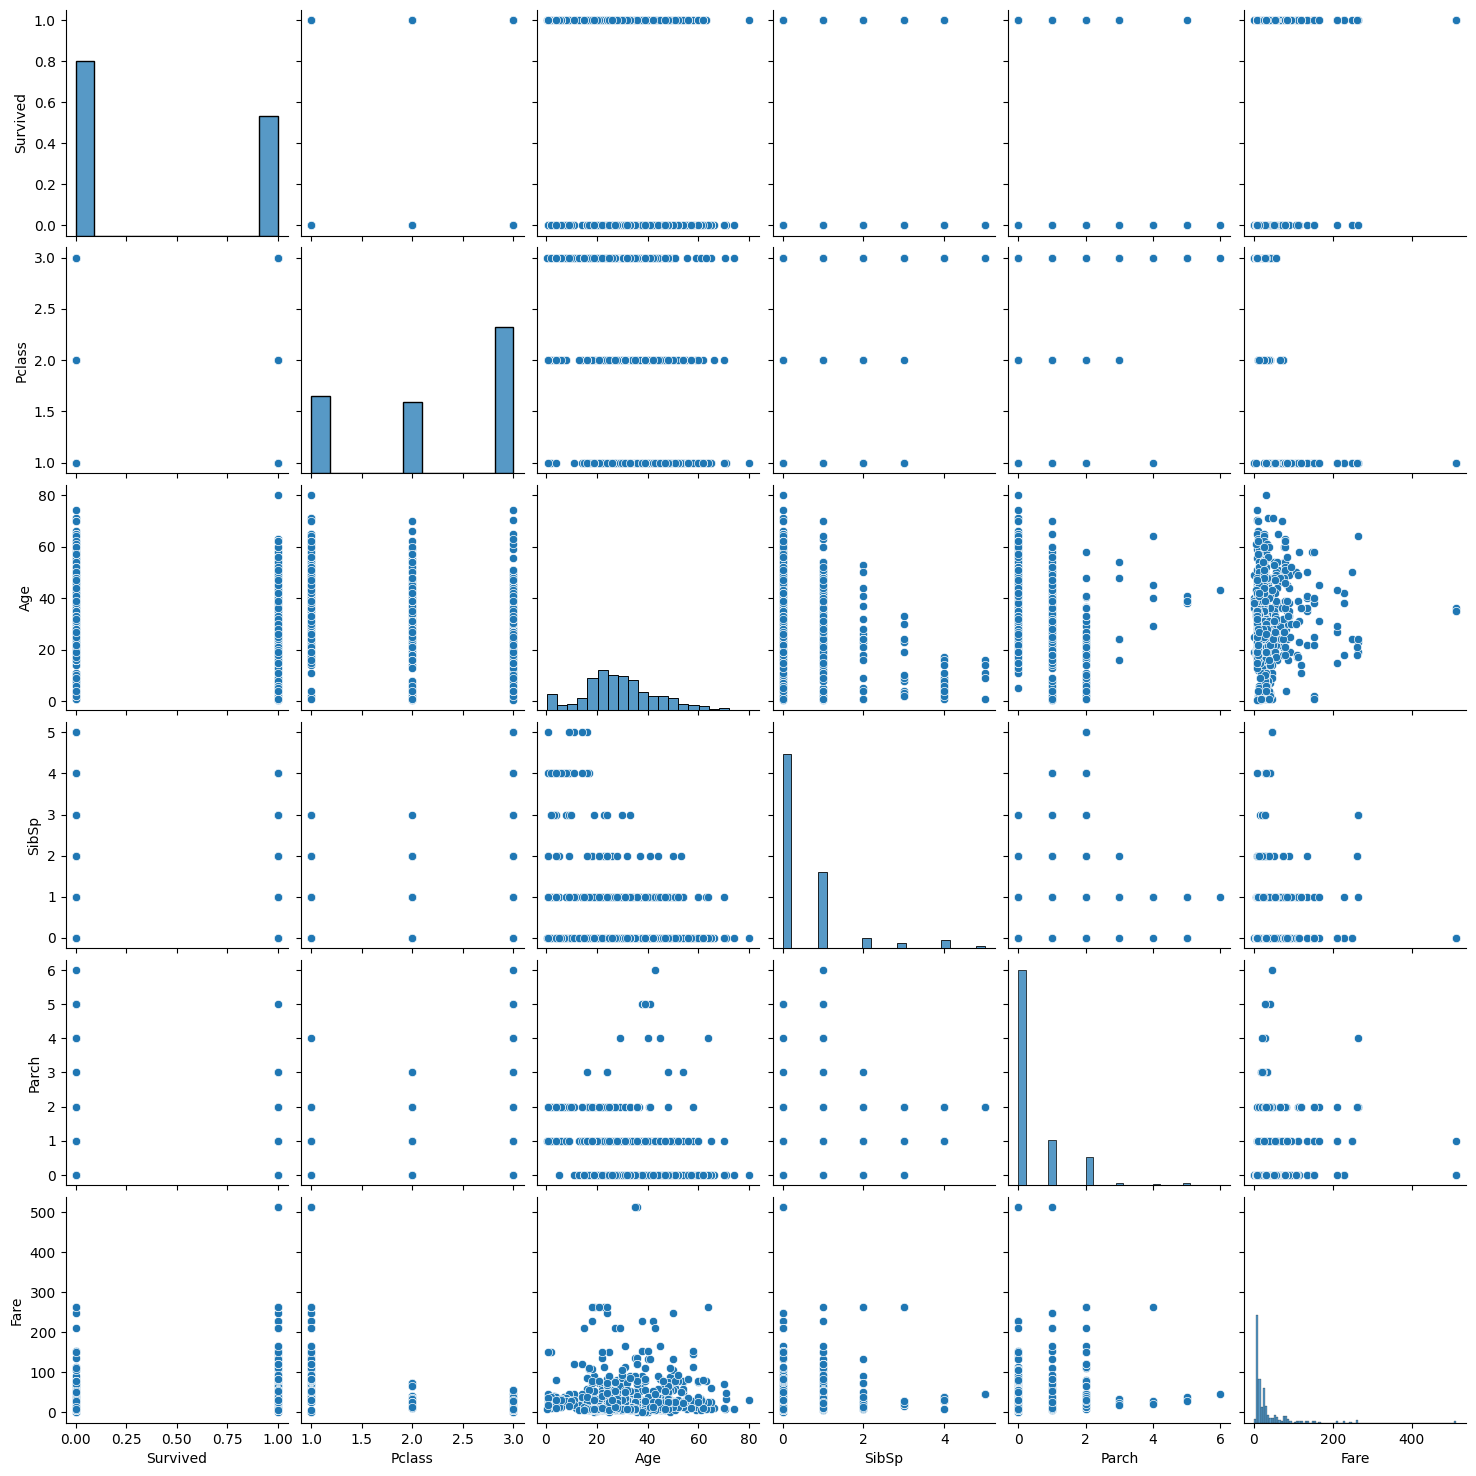

In [66]:
sns.pairplot(df_nums)

# Интерактивный sunburst plot (визуализация иерархических данных) с помощью plotly. На первом уровне иерархии - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе

In [85]:
level1 = df['Pclass'].value_counts().sort_index()
level2 = df[['Pclass', 'Sex']].groupby(['Pclass', 'Sex']).value_counts().sort_index()
level2

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: count, dtype: int64

In [86]:
import plotly.express as px

In [91]:
fig = px.sunburst(df, path=['Pclass', 'Sex'])
fig.update_layout(title="Распределение пассажиров по классам и полу", margin=dict(t=50, l=0, r=0, b=0))
fig.show()

# Снабдите все построенные графики наименованиями (title), подписями осей, легендами

In [ ]:
print('Сделано!')

Сделано!
